# Intro

Pandas has first-class support for datetime types, including flexible indexing, vectorized operations, `groupby` operations and joins. This makes EDA on time series data with Pandas very convenient and productive.

In [6]:
%pylab inline
plt.style.use('bmh')

import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [9]:
DATA_DIR = pathlib.Path("./")

In [8]:
print(DATA_DIR)

.


# Loading data

The dataset we'll use to explore time series functionality in Pandas is [1.6 million UK traffic accidents](https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales). The full dataset contains years 2005-2007, but note that in the Exam we only use 2005.

In [11]:
d = pd.read_csv(DATA_DIR.joinpath('accidents_2005_to_2007.csv.zip'),low_memory=False)

Dataset is quite large. Let's explore it's per-column breakdown:

In [12]:
d.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date                                         570011 non-nul

As we can see, it has data and time separately, and we need to combine it into full datetime:

In [13]:
d.Date.head()

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
Name: Date, dtype: object

In [15]:
d.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [14]:
d.Time.head()

0    17:42
1    17:36
2    00:15
3    10:35
4    21:13
Name: Time, dtype: object

Let's explore if we have any missing dates or times:

In [16]:
d[d.Date.isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year


In [20]:
d[d.Time.isnull()]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,dt
29084,200504AL05142,342200.0,432250.0,-2.878714,53.783349,4,3,2,1,30/11/2005,...,Daylight: Street light present,Unknown,NaN,NaN,NaN,1,NaN,E01025009,2005,30/11/2005 00:00
110943,2.01E+12,554450.0,281270.0,0.269172,52.407602,35,3,1,1,09/02/2005,...,Darkness: Street lighting unknown,Unknown,Dry,None,None,1,No,E01018028,2005,09/02/2005 00:00
110990,2.01E+12,542970.0,259050.0,0.091097,52.211087,35,3,2,1,16/02/2005,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01017984,2005,16/02/2005 00:00
111018,2.01E+12,517770.0,281930.0,-0.269528,52.422651,35,3,1,1,20/02/2005,...,Darkness: Street lighting unknown,Unknown,Dry,None,None,2,Yes,E01018192,2005,20/02/2005 00:00
111607,2.01E+12,516440.0,302060.0,-0.282036,52.603825,35,3,2,1,06/05/2005,...,Darkness: Street lighting unknown,Unknown,Dry,None,None,1,No,E01015593,2005,06/05/2005 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563752,2.01E+12,280300.0,686760.0,-3.923863,56.058715,96,3,1,1,06/05/2007,...,Darkeness: No street lighting,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2007,06/05/2007 00:00
563813,2.01E+12,299650.0,680980.0,-3.611104,56.011255,96,3,2,1,09/06/2007,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,NaN,2007,09/06/2007 00:00
563952,2.01E+12,288240.0,682680.0,-3.794724,56.023996,96,2,2,1,23/08/2007,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,NaN,2007,23/08/2007 00:00
563970,2.01E+12,280630.0,680670.0,-3.915856,56.004111,96,2,1,1,02/09/2007,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2007,02/09/2007 00:00


We may note the following:
    
- date and time are provided as strings,
- we have slashes in dates, and this can be parsed ambiguously,
- some times are missing.

Hence, our strategy is the following:

- concatenate date and time using string vectorized operations,
- set placeholder for missing times to be `00:00`,
- parse resulting (**string**) datetime with explicit `dayfirst=True`.

In [18]:
d.loc[:, 'dt'] = d.Date.str.cat(d.Time, sep=' ', na_rep='00:00')

In [19]:
d.dt

0         04/01/2005 17:42
1         05/01/2005 17:36
2         06/01/2005 00:15
3         07/01/2005 10:35
4         10/01/2005 21:13
                ...       
570006    20/12/2007 22:01
570007    21/12/2007 13:12
570008    23/12/2007 03:07
570009    23/12/2007 20:00
570010    22/12/2007 11:31
Name: dt, Length: 570011, dtype: object

In [21]:
d.loc[:, 'date_time'] = pd.to_datetime(d.dt, dayfirst=True)

We now have `date_time` column of type `datetime64[ns]`:

In [22]:
d.info()  # Note the difference without `memory_usage="deep"`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               570011 non-null  object        
 1   Location_Easting_OSGR                        569910 non-null  float64       
 2   Location_Northing_OSGR                       569910 non-null  float64       
 3   Longitude                                    569910 non-null  float64       
 4   Latitude                                     569910 non-null  float64       
 5   Police_Force                                 570011 non-null  int64         
 6   Accident_Severity                            570011 non-null  int64         
 7   Number_of_Vehicles                           570011 non-null  int64         
 8   Number_of_Casualties                         570011 non-null  in

Let's filter some columns we do not need:

In [26]:
d.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'date_time'],
      dtype='object')

In [24]:
COLS = ['Accident_Index', 'Longitude', 'Latitude',
        'Accident_Severity', 'Number_of_Vehicles',
        'Number_of_Casualties', 'Weather_Conditions',
        'Day_of_Week', 'Road_Surface_Conditions',
        'Special_Conditions_at_Site', 'Urban_or_Rural_Area',
        'Carriageway_Hazards', 'date_time']

In [25]:
d.drop([c for c in d.columns if c not in COLS], axis=1, inplace=True)

Pandas has a dedicated set of index types for datetime indexes:

In [27]:
d.set_index('date_time', inplace=True)

In [28]:
d.index

DatetimeIndex(['2005-01-04 17:42:00', '2005-01-05 17:36:00',
               '2005-01-06 00:15:00', '2005-01-07 10:35:00',
               '2005-01-10 21:13:00', '2005-01-11 12:40:00',
               '2005-01-13 20:40:00', '2005-01-14 17:35:00',
               '2005-01-15 22:43:00', '2005-01-15 16:00:00',
               ...
               '2007-12-14 00:01:00', '2007-12-16 04:30:00',
               '2007-12-17 13:07:00', '2007-12-17 13:24:00',
               '2007-12-19 16:05:00', '2007-12-20 22:01:00',
               '2007-12-21 13:12:00', '2007-12-23 03:07:00',
               '2007-12-23 20:00:00', '2007-12-22 11:31:00'],
              dtype='datetime64[ns]', name='date_time', length=570011, freq=None)

In [31]:
d.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
date_time,,,,,,,,,,,,
2005-01-01 00:01:00,2.01E+12,-2.967122,57.539108,3,2,1,7,Snowing with high winds,Snow,None,None,2
2005-01-01 00:05:00,2.01E+12,-0.095826,52.378530,3,1,1,7,Fine without high winds,Wet/Damp,None,None,2
2005-01-01 00:10:00,2.01E+12,0.374698,51.431513,3,1,1,7,Fine without high winds,Dry,None,None,1
2005-01-01 00:15:00,200501YE80011,-0.048247,51.614411,3,1,1,7,Fine without high winds,Dry,None,None,1
2005-01-01 00:16:00,200501RY10089,0.180406,51.478547,3,1,1,7,Fine without high winds,Dry,None,None,1


# `DatetimeIndex` in details

`DatetimeIndex` is special in many ways. It allows for much more flexible indexing compared to usual indexes. First of all, you can use strings, not just actual index labels. To leverage this, we first sort the index:

In [30]:
d.sort_index(inplace=True)

We can now use strings to index the dataframe (indexing non-monotonic `DatetimeIndex` with strings is not a very good idea):

In [32]:
d["2006-02-12 20":"2006-03"]

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
date_time,,,,,,,,,,,,
2006-02-12 20:00:00,200605AA05778,-3.072175,53.369452,3,1,1,1,Raining without high winds,Wet/Damp,None,None,2
2006-02-12 20:00:00,200640D005170,-0.437344,51.867157,3,3,1,1,Fine without high winds,Dry,None,None,2
2006-02-12 20:00:00,200601PY20070,0.088569,51.359712,3,1,1,1,Raining without high winds,Wet/Damp,None,None,1
2006-02-12 20:00:00,2.01E+12,-1.047741,50.830862,3,2,1,1,Fine without high winds,Dry,None,None,1
2006-02-12 20:05:00,200650A21B944,-5.255975,50.230554,3,2,1,1,Fine without high winds,Dry,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-03-31 23:50:00,20064100B0224,-0.173482,51.794026,3,1,3,6,Raining without high winds,Wet/Damp,None,None,1
2006-03-31 23:55:00,200601KG70115,0.127453,51.541392,3,2,1,6,Fine without high winds,Dry,None,None,1
2006-03-31 23:55:00,200650E41D819,-4.181101,50.384341,3,2,2,6,Fine without high winds,Dry,None,None,1


In [ ]:
d["2005":]

Note, how Pandas allows for partial datetime string specification. Of course, this way of indexing can be combined with column index:

In [33]:
d.loc["2005", "Accident_Severity"]

date_time
2005-01-01 00:01:00    3
2005-01-01 00:05:00    3
2005-01-01 00:10:00    3
2005-01-01 00:15:00    3
2005-01-01 00:16:00    3
                      ..
2005-12-31 23:50:00    2
2005-12-31 23:54:00    2
2005-12-31 23:55:00    3
2005-12-31 23:55:00    2
2005-12-31 23:59:00    3
Name: Accident_Severity, Length: 198735, dtype: int64

We will now create a dataframe used in Problem 6 of the exam:

In [34]:
d.loc["2005", "Accident_Severity"].to_csv(DATA_DIR.joinpath("accidents_2005.csv"))

In [35]:
accidents_2005 = pd.read_csv(DATA_DIR.joinpath("accidents_2005.csv"),
                             parse_dates=["date_time"])

In [36]:
accidents_2005.head()

,date_time,Accident_Severity
0,2005-01-01 00:01:00,3
1,2005-01-01 00:05:00,3
2,2005-01-01 00:10:00,3
3,2005-01-01 00:15:00,3
4,2005-01-01 00:16:00,3


Note, that it's not indexed, and that's exactly the way it's passed to the solution function.

# Resampling time series

Time series in Pandas can be easily resampled to any frequency:

In [37]:
d.resample('D')

Similar to `groupby`, `resample` doesn't perform any operations on it's own, but just calculates which rows go to which (datetime) bin. We need to further apply some aggregation operation. For example, we may calculate number of accidents per day:

In [38]:
daily = d.resample('D').size()
daily

date_time
2005-01-01    308
2005-01-02    306
2005-01-03    293
2005-01-04    473
2005-01-05    523
             ... 
2007-12-27    286
2007-12-28    328
2007-12-29    316
2007-12-30    192
2007-12-31    249
Freq: D, Length: 1095, dtype: int64

`daily` has `DatetimeIndex` as well and has `freq` specified (as it was constructed to have one):

In [39]:
daily.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2007-12-22', '2007-12-23', '2007-12-24', '2007-12-25',
               '2007-12-26', '2007-12-27', '2007-12-28', '2007-12-29',
               '2007-12-30', '2007-12-31'],
              dtype='datetime64[ns]', name='date_time', length=1095, freq='D')

In [40]:
daily.index.is_monotonic, daily.index.is_unique

(True, True)

Pandas also exposes plotting functionality to datetime-indexed dataframes. To illustrate this, let's plot daily and weekly average number of accidents:

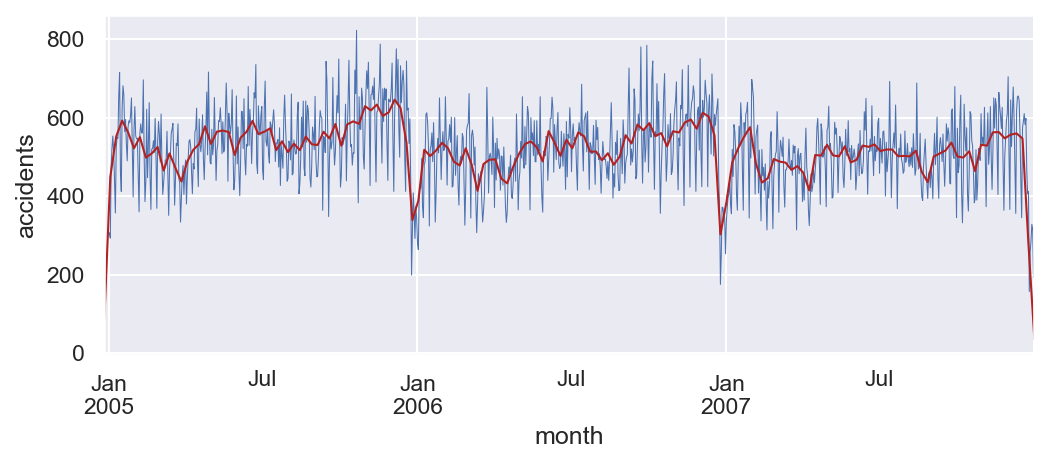

In [41]:
# Just a hint: you can set image resolution in dpi
plt.figure(figsize=(8,3), dpi=150)  

daily.plot(ax=plt.gca(), linewidth=0.5)

(d.resample('W').size()/7.).plot(ax=plt.gca(),
                                 linewidth=1,
                                 color='firebrick')

plt.ylabel('accidents')
plt.xlabel('month');

In EDA terms, we just gained our first insight: accidents are strongly seasonal (with non-trivial seasonal struture and high dependence on holidays).

Similarly, we can plot daily and weekly average number of vehicles involved:

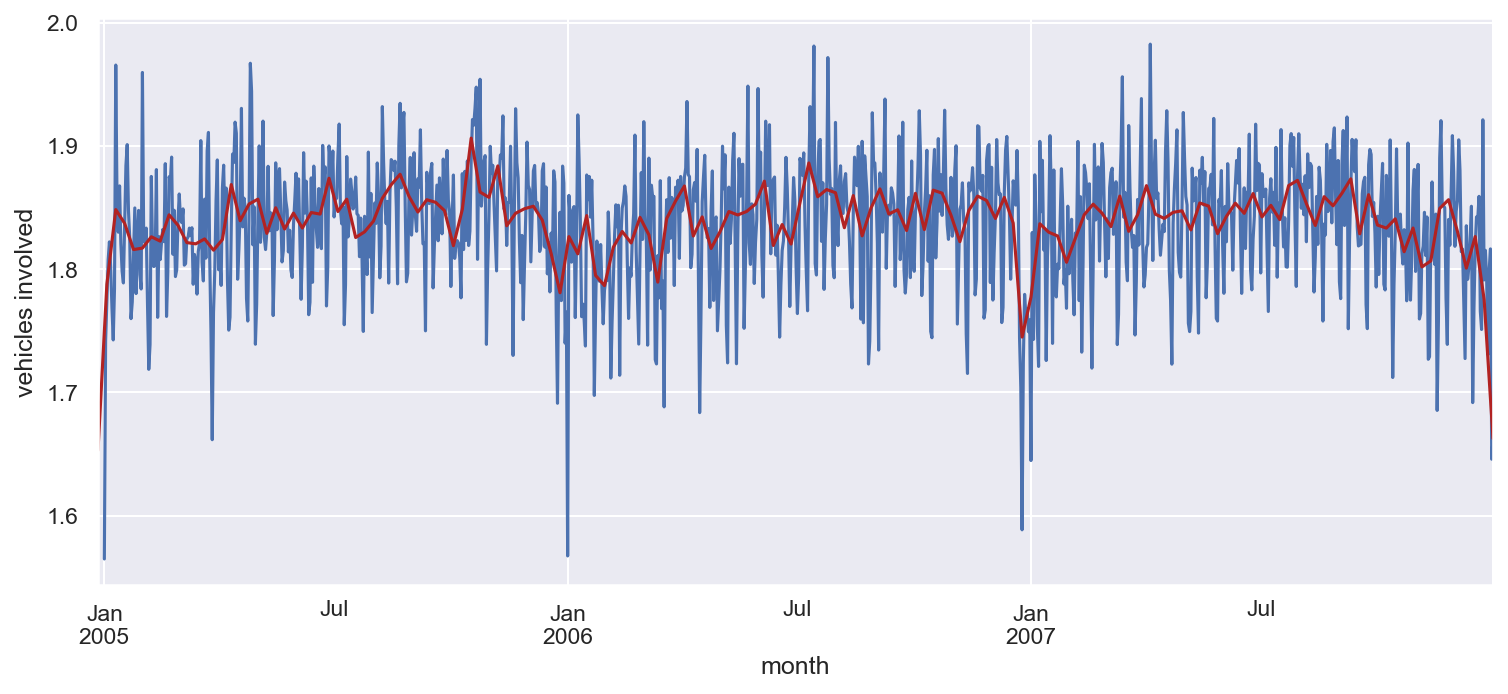

In [42]:
plt.figure(figsize=(12,5), dpi=150)

d.resample('D').Number_of_Vehicles.mean().plot(ax=plt.gca())
d.resample('W').Number_of_Vehicles.mean().plot(ax=plt.gca(), color='firebrick')

plt.ylabel('vehicles involved')
plt.xlabel('month');

Instead of `resample`, we can use `pd.Grouper`. It's not really useful as a replacement of `resample`, but is very handy in compound grouping keys.

In [43]:
d.groupby(pd.Grouper(freq='D'))["Number_of_Casualties"].mean()

date_time
2005-01-01    1.467532
2005-01-02    1.529412
2005-01-03    1.426621
2005-01-04    1.266385
2005-01-05    1.311663
                ...   
2007-12-27    1.304196
2007-12-28    1.481707
2007-12-29    1.408228
2007-12-30    1.307292
2007-12-31    1.369478
Freq: D, Name: Number_of_Casualties, Length: 1095, dtype: float64

Now, let's try to extract the accidents, which have more casualties, than average number of casualties on that day. And now Pandas datetime magic comes into play:

In [44]:
daily_casualties = (d
                    .groupby(pd.Grouper(freq='D'))["Number_of_Casualties"]
                    .mean())

df = d.merge(daily_casualties,
             left_on=d.index.floor("1D"),
             right_index=True,
             suffixes=("", "_daily"))

Note that Pandas keeps the calculated key it used for merging as `key_0`:

In [45]:
df.head()

,key_0,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Number_of_Casualties_daily
date_time,,,,,,,,,,,,,,
2005-01-01 00:01:00,2005-01-01,2.01E+12,-2.967122,57.539108,3,2,1,7,Snowing with high winds,Snow,None,None,2,1.467532
2005-01-01 00:05:00,2005-01-01,2.01E+12,-0.095826,52.378530,3,1,1,7,Fine without high winds,Wet/Damp,None,None,2,1.467532
2005-01-01 00:10:00,2005-01-01,2.01E+12,0.374698,51.431513,3,1,1,7,Fine without high winds,Dry,None,None,1,1.467532
2005-01-01 00:15:00,2005-01-01,200501YE80011,-0.048247,51.614411,3,1,1,7,Fine without high winds,Dry,None,None,1,1.467532
2005-01-01 00:16:00,2005-01-01,200501RY10089,0.180406,51.478547,3,1,1,7,Fine without high winds,Dry,None,None,1,1.467532


We do not need it at the moment, so we'll drop it:

In [46]:
df.drop("key_0", axis=1, inplace=True)

We can now calculate how extreme each accident is compared to daily averages:

In [ ]:
df["delta"] = df["Number_of_Casualties"] - df["Number_of_Casualties_daily"]

In [ ]:
df.loc["2005"].sort_values(by="delta", ascending=False)

Let's explore the most extreme one:

In [47]:
d[d.Accident_Index=="200597EC70504"]

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
date_time,,,,,,,,,,,,
2005-04-12 17:35:00,200597EC70504,-4.232855,55.87439,2,4,35,3,Fine without high winds,Dry,Auto traffic singal out,None,1


You may want to further investigate this case (with Google of course).

Let's get back to `pd.Grouper` and compound keys. We can flexibly combine grouper on datetime index with usual column. Let's calculate now many accidents we have per area type each day:

In [48]:
d.groupby([pd.Grouper(freq='1M'), 'Urban_or_Rural_Area']).size()

date_time   Urban_or_Rural_Area
2005-01-31  1                      10368
            2                       5905
            3                          5
2005-02-28  1                       9211
            2                       5309
                                   ...  
2007-11-30  1                      10585
            2                       5974
2007-12-31  1                       9205
            2                       5499
            3                          4
Length: 102, dtype: int64

Now we can plot this as a stacked bar plot:

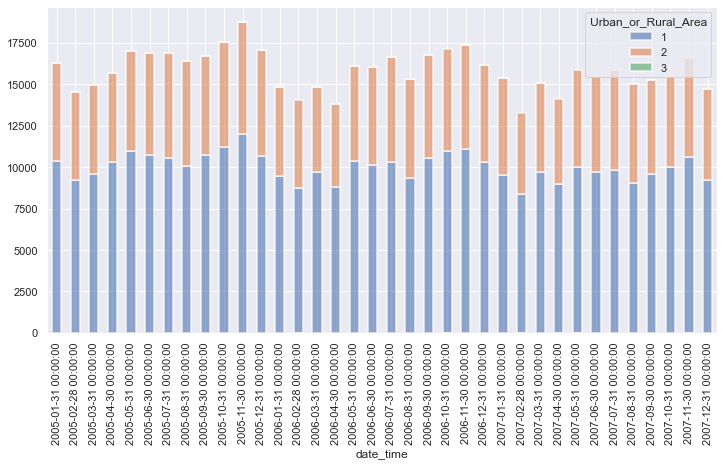

In [49]:
plt.figure(figsize=(12,6))

(d.groupby([pd.Grouper(freq='1M'), 'Urban_or_Rural_Area'])
 .size()
 .unstack()
 .plot(alpha=0.6, linewidth=2, ax=plt.gca(), kind='bar', stacked=True));

We can do the same with accident severity:

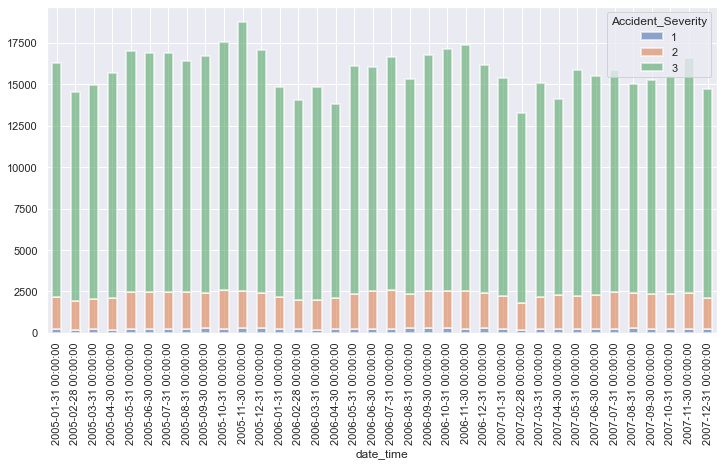

In [50]:
plt.figure(figsize=(12,6))

(d.groupby([pd.Grouper(freq='1M'), 'Accident_Severity'])
 .size()
 .unstack()
 .plot(alpha=0.6, linewidth=2, ax=plt.gca(), kind='bar', stacked=True));